In [1]:
%load_ext autoreload
%autoreload 2

# Python imports
import pickle

# Third-Party Imports
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size']=10

In [2]:
# Define the independent variable bounds and discrete increments
x_min = 0.0; x_max = 10; dx = 0.01;
x = np.linspace(x_min, x_max, int((x_max-x_min)/dx)+1)

In [3]:
# Linear S-L coefficients
file_stem = "../data/S1-LSL-"
lin_coeffs = pickle.load(open(file_stem + "coeffs.pickle", "rb"))
linear_p = lin_coeffs['p']
linear_q = lin_coeffs['q']

In [4]:
# Nonlinear S-L coefficients
file_stem = "../data/S2-NLSL-"
nl_coeffs = pickle.load(open(file_stem + "coeffs.pickle", "rb"))
nonlin_p = nl_coeffs['p']
nonlin_q = nl_coeffs['q']

In [5]:
# Second Order Poisson coefficients
file_stem = "../data/S3-P2-"
sop_coeffs = pickle.load(open(file_stem + "coeffs.pickle", "rb"))
poisson_p = sop_coeffs['p']

In [6]:
# Euler Bernoulli coefficients
file_stem = "../data/S4-EB-"
eb_coeffs = pickle.load(open(file_stem + "coeffs.pickle", "rb"))
euler_p = eb_coeffs['p']

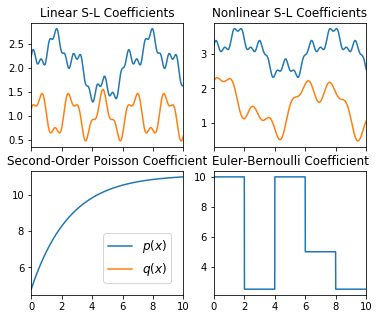

In [7]:
fig = plt.figure(figsize=(6,5))
axs = fig.subplots(2, 2, sharex=True)

line1 = axs[0,0].plot(x, linear_p)
line2 = axs[0,0].plot(x, linear_q)
axs[0,0].set_title("Linear S-L Coefficients")

axs[0,1].plot(x, nonlin_p)
axs[0,1].plot(x, nonlin_q)
axs[0,1].set_title("Nonlinear S-L Coefficients")

axs[1,0].plot(x, poisson_p)
axs[1,0].set_title("Second-Order Poisson Coefficient")

axs[1,1].plot(x, euler_p)
axs[1,1].set_title("Euler-Bernoulli Coefficient")

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].set_xlim([0,10]) 

axs[1,0].legend([line1[0], line2[0]],["$p(x)$", "$q(x)$"], loc='lower right', borderaxespad=1.0,fontsize=12)

fig.savefig('SI-Coeffs.png', dpi=1200)
plt.show()